In [176]:
# 导入常用库
import numpy as np
import pandas as pd

In [177]:
# 读取完成清理及特征工程的数据
# 数据1：编码格式/code
# 数据2：one-hot格式/dummy
data_1 = pd.read_excel(r'../data/titanic/data_factorized.xlsx', index_col=0)
data_2 = pd.read_excel(r'../data/titanic/data_dummy.xlsx',index_col=0)
data = data_2.copy()

In [178]:
train_x = data[data['Survived'].notnull()].drop(['PassengerId','Survived'], axis=1)
train_y = data[data['Survived'].notnull()][['Survived']]
test_x = data[data['Survived'].isnull()].drop(['PassengerId','Survived'], axis=1)
test_y = data[data['Survived'].isnull()][['PassengerId','Survived']]

In [179]:
# 数据拆分
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
train_y = to_categorical(train_y)
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2)

In [180]:
# 定义模型
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np
 
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(32, activation='relu', input_dim=39))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
 
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [181]:
# 训练模型
history = model.fit(X_train, y_train,
                      epochs=50,
                      batch_size=128,
                      validation_data=(X_test, y_test))  # 验证集

Train on 712 samples, validate on 179 samples
Epoch 1/50
712/712 [==============================] - 0s 389us/step - loss: 0.7401 - accuracy: 0.5028 - val_loss: 0.6937 - val_accuracy: 0.5698
Epoch 2/50
712/712 [==============================] - 0s 37us/step - loss: 0.7239 - accuracy: 0.5463 - val_loss: 0.6623 - val_accuracy: 0.6201
Epoch 3/50
712/712 [==============================] - 0s 38us/step - loss: 0.6701 - accuracy: 0.6152 - val_loss: 0.6387 - val_accuracy: 0.6425
Epoch 4/50
712/712 [==============================] - 0s 39us/step - loss: 0.6730 - accuracy: 0.5983 - val_loss: 0.6198 - val_accuracy: 0.6704
Epoch 5/50
712/712 [==============================] - 0s 37us/step - loss: 0.6271 - accuracy: 0.6390 - val_loss: 0.6036 - val_accuracy: 0.6983
Epoch 6/50
712/712 [==============================] - 0s 39us/step - loss: 0.5982 - accuracy: 0.6756 - val_loss: 0.5886 - val_accuracy: 0.6927
Epoch 7/50
128/712 [====>.........................] - ETA: 0s - loss: 0.6271 - accuracy: 0.7171

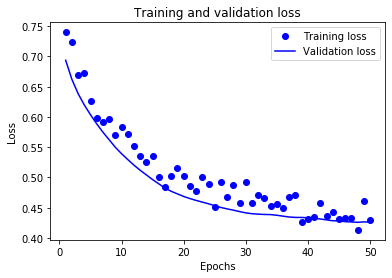

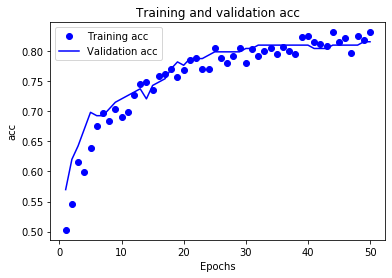

In [182]:
import matplotlib.pyplot as plt

# 画出训练集和验证集的损失和精度变化，分析模型状态

acc = history.history['accuracy']  # 训练集acc
val_acc = history.history['val_accuracy']  # 验证集 acc
loss = history.history['loss']  # 训练损失
val_loss = history.history['val_loss']  # 验证损失

epochs = range(1, len(acc)+1)  # 迭代次数

plt.plot(epochs, loss, 'bo', label='Training loss')  # bo for blue dot 蓝色点
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')  # bo for blue dot 蓝色点
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

In [183]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \nError on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \nError on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on training data: 0.8398876190185547% 
Error on training data: 0.1601123809814453
Accuracy on test data: 0.8156424760818481% 
Error on test data: 0.18435752391815186


In [184]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)